<a href="https://colab.research.google.com/github/ksizorCode/visionado/blob/main/M3_Caracteristicas_Imagen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Detección de Características en Imágenes
Una imagen digital es una matriz de píxeles, donde cada píxel representa una combinación de colores codificada (por ejemplo, RGB). Para que una máquina pueda "entender" una imagen, es necesario extraer características relevantes como bordes, esquinas, texturas, puntos clave, etc. A continuación se presentan los filtros y detectores más comunes en visión por ordenador.

## 🔍 Detectores de Bordes
Los detectores de bordes son algoritmos utilizados en procesamiento de imágenes para identificar zonas donde hay cambios bruscos de intensidad. Estos cambios suelen corresponder a los contornos de objetos dentro de una imagen, y son fundamentales en tareas como segmentación, reconocimiento de formas y visión por computadora.


Detectar bordes permite:
- Resaltar estructuras relevantes en imágenes.
- Facilitar el análisis de formas y objetos.
- Reducir la cantidad de datos manteniendo información clave.

Tipos y enfoques comunes:
Gradiente (primera derivada): Miden el cambio en la intensidad (ej. Sobel, Prewitt, Scharr).

Detectan bordes donde hay transiciones abruptas.

Laplace (segunda derivada): Miden la tasa de cambio del gradiente (ej. operador Laplaciano).

Detectan puntos donde el cambio es máximo, pero son más sensibles al ruido.

Algoritmos más avanzados: Canny: combina suavizado, gradiente y umbralización para obtener bordes finos y continuos con mínima respuesta al ruido.

Roberts: usa un kernel pequeño (2x2), rápido pero muy básico.

En resumen, los detectores de bordes transforman imágenes complejas en representaciones más simples y estructuradas, permitiendo una interpretación más eficiente por parte de sistemas de visión artificial.

---

| Detector | Características                                                      | Ventajas                                                | Desventajas                                               | Uso Típico                             |
|----------|----------------------------------------------------------------------|----------------------------------------------------------|------------------------------------------------------------|----------------------------------------|
| Canny    | Algoritmo en 3 etapas, incluye suavizado, gradiente y umbralización por histéresis | Alta precisión, bordes delgados y continuos, buena supresión de ruido | Computacionalmente costoso, requiere ajuste de parámetros | Segmentación, contornos precisos       |
| Sobel    | Operador de gradiente 3x3, direcciones X/Y                           | Rápido, simple, buena detección de bordes fuertes        | Menos preciso en esquinas, bordes gruesos                 | Detección rápida, preprocesamiento     |
| Scharr   | Variante mejorada de Sobel, mayor precisión angular                  | Preciso, buena respuesta a detalles finos                | Ligero aumento de coste computacional                     | Detección de bordes con precisión angular |
| Laplace  | Operador de segunda derivada, respuesta isotrópica                   | Detecta bordes finos, rotación invariante                | Muy sensible al ruido, puede generar bordes dobles        | Realce de detalles, detección general de bordes |
| Prewitt  | Similar a Sobel, kernels simples 3x3                                 | Muy rápido, fácil de implementar                         | Menos preciso, más sensible al ruido                      | Aplicaciones en tiempo real            |
| Roberts  | Kernel 2x2, muy simple y rápido                                      | Muy rápido, bajo coste computacional                     | Muy sensible al ruido, discontinuidades                   | Detección básica en imágenes simples   |


OpenCV error during HED processing: OpenCV(4.11.0) /io/opencv/modules/dnn/src/caffe/caffe_io.cpp:1162: error: (-2:Unspecified error) FAILED: ReadProtoFromTextFile(param_file, param). Failed to parse NetParameter file: deploy.prototxt in function 'ReadNetParamsFromTextFileOrDie'



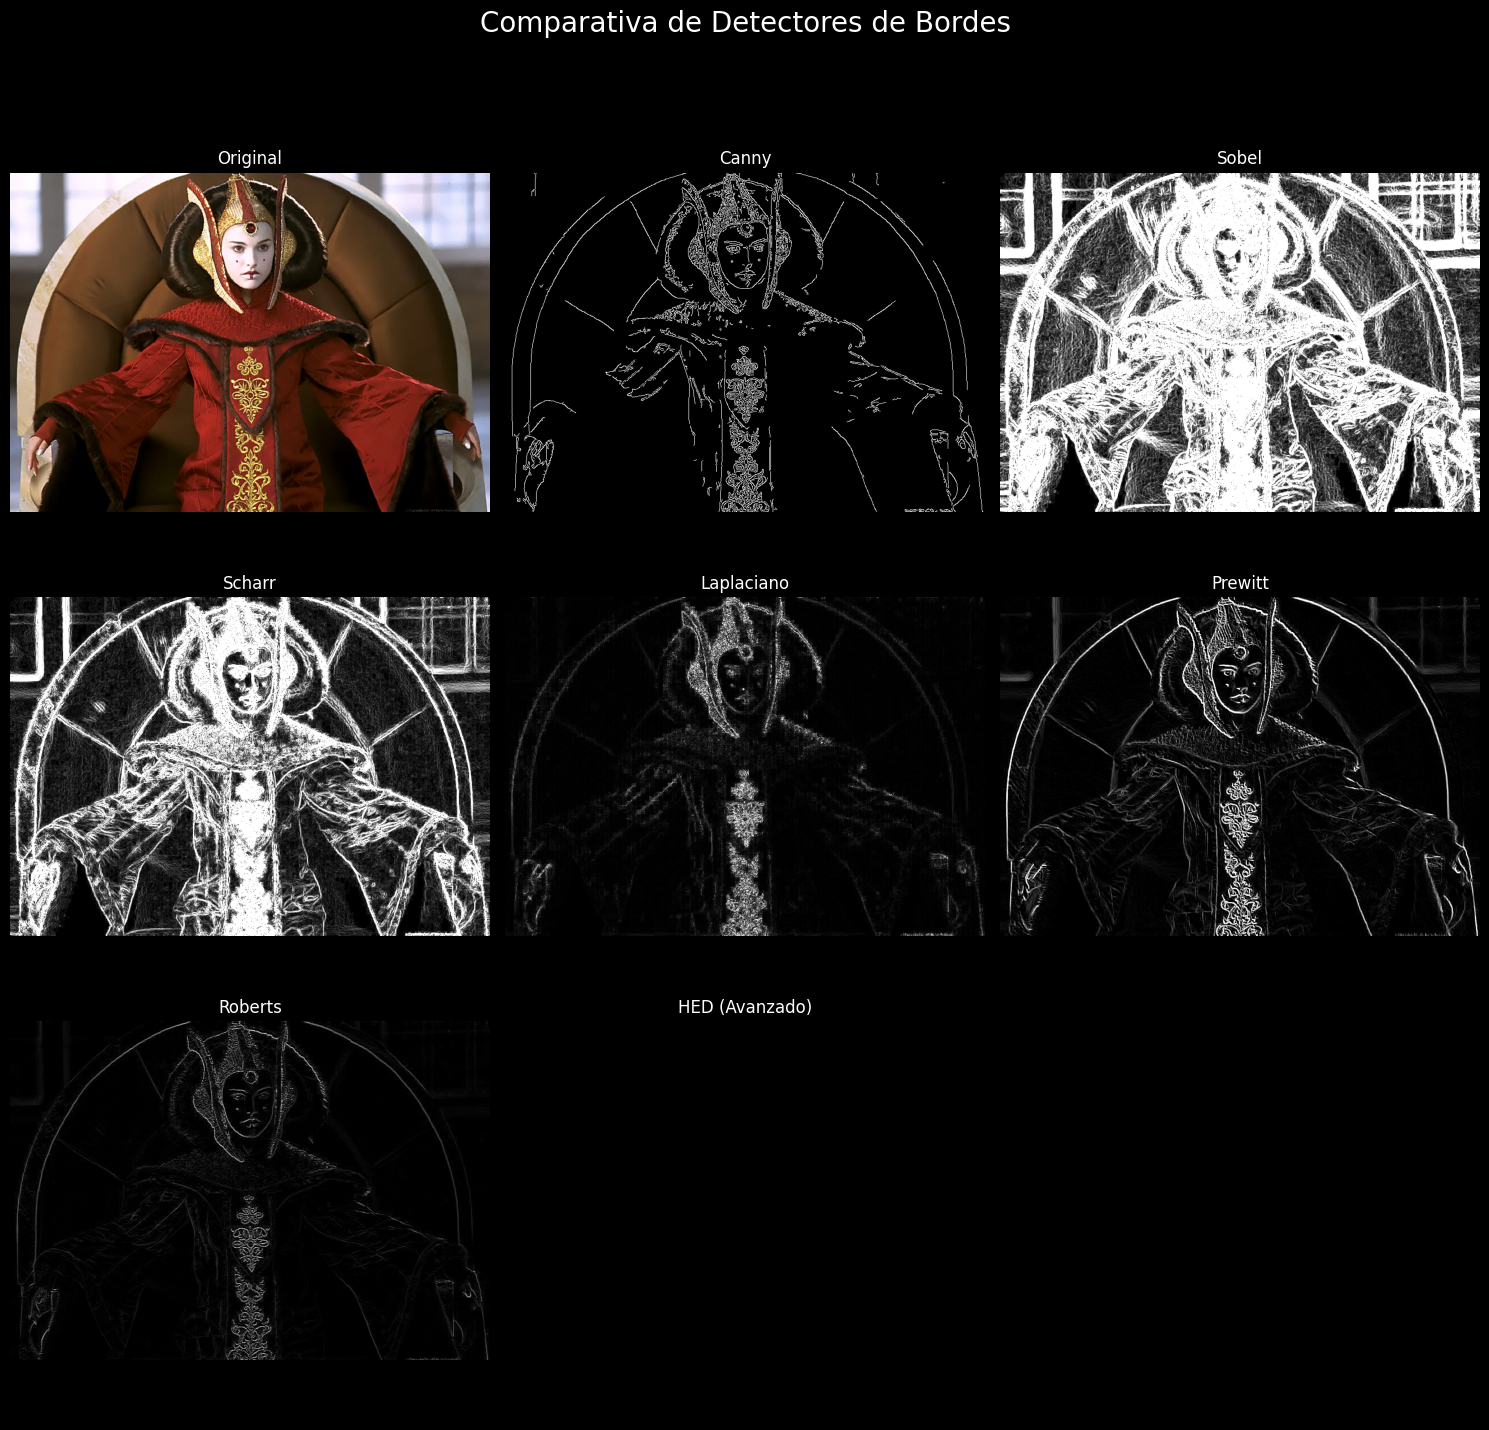

In [11]:
import cv2
import numpy as np
import requests
from matplotlib import pyplot as plt

# --- 1. CONFIGURACIÓN INICIAL Y CARGA DE IMAGEN ---

# URL de una imagen de ejemplo
url_imagen ="https://static.wikia.nocookie.net/esstarwars/images/0/0d/Reina_Amidala.jpg/revision/latest?cb=20080808001232"

# Descargar la imagen
try:
    response = requests.get(url_imagen, stream=True)
    response.raise_for_status()
    image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
    img = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
except requests.exceptions.RequestException as e:
    print(f"Error al descargar la imagen: {e}")
    # Usar una imagen de muestra de Colab si la descarga falla
    from sklearn.datasets import load_sample_image
    img = cv2.cvtColor(load_sample_image("flower.jpg"), cv2.COLOR_RGB2BGR)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# --- 2. DETECTORES DE BORDES CLÁSICOS ---

# Canny: El más popular y efectivo de los clásicos
canny = cv2.Canny(img_gray, 100, 200)

# Sobel: Detecta bordes horizontales y verticales
sobel_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=5)
sobel = cv2.bitwise_or(cv2.convertScaleAbs(sobel_x), cv2.convertScaleAbs(sobel_y))

# Scharr: Variante de Sobel, a veces más precisa para gradientes finos
scharr_x = cv2.Scharr(img_gray, cv2.CV_64F, 1, 0)
scharr_y = cv2.Scharr(img_gray, cv2.CV_64F, 0, 1)
scharr = cv2.bitwise_or(cv2.convertScaleAbs(scharr_x), cv2.convertScaleAbs(scharr_y))

# Laplaciano (Laplace): Detecta regiones de cambio rápido de intensidad
laplacian = cv2.Laplacian(img_gray, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

# Prewitt (implementación manual, no está en OpenCV por defecto)
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewitt_x = cv2.filter2D(img_gray, -1, kernelx)
prewitt_y = cv2.filter2D(img_gray, -1, kernely)
prewitt = cv2.bitwise_or(prewitt_x, prewitt_y)

# Roberts (implementación manual)
kernel_roberts_x = np.array([[1, 0], [0, -1]])
kernel_roberts_y = np.array([[0, 1], [-1, 0]])
roberts_x = cv2.filter2D(img_gray, -1, kernel_roberts_x)
roberts_y = cv2.filter2D(img_gray, -1, kernel_roberts_y)
roberts = cv2.bitwise_or(roberts_x, roberts_y)


# --- 3. DETECTOR AVANZADO: HOLISTICALLY-NESTED EDGE DETECTION (HED) ---

# Descargar el modelo pre-entrenado de HED
# (Crop layer no es soportada por defecto en OpenCV DNN, se usa un modelo adaptado)
proto_path = "deploy.prototxt"
model_path = "hed_pretrained_bsds.caffemodel"

# Descargar los archivos del modelo
# Using a different prototxt that is known to work better with OpenCV DNN
url_proto = "https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/hed_deploy.prototxt"
url_model = "https://github.com/ashishkumar-hub/HED/raw/main/hed_pretrained_bsds.caffemodel"

try:
    proto_file = requests.get(url_proto)
    with open(proto_path, 'wb') as f:
        f.write(proto_file.content)

    model_file = requests.get(url_model)
    with open(model_path, 'wb') as f:
        f.write(model_file.content)

    # Cargar la red
    net = cv2.dnn.readNetFromCaffe(proto_path, model_path)

    # Pre-procesar la imagen para HED
    # The mean values might need adjustment depending on the model's training data
    blob = cv2.dnn.blobFromImage(img, scalefactor=1.0, size=(500, 500),
                               mean=(104.00698793, 116.66876762, 122.67891434),
                               swapRB=False, crop=False)
    net.setInput(blob)
    hed = net.forward()
    hed = cv2.resize(hed[0, 0], (img.shape[1], img.shape[0]))
    hed = (255 * hed).astype("uint8")

except requests.exceptions.RequestException as e:
    print(f"No se pudo descargar el modelo HED: {e}")
    hed = np.zeros_like(img_gray) # Fallback
except cv2.error as e:
    print(f"OpenCV error during HED processing: {e}")
    hed = np.zeros_like(img_gray) # Fallback


# --- 4. VISUALIZACIÓN DE RESULTADOS ---

plt.style.use('dark_background')
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Comparativa de Detectores de Bordes', fontsize=20)

# Títulos y imágenes a mostrar
titles = ['Original', 'Canny', 'Sobel', 'Scharr', 'Laplaciano', 'Prewitt', 'Roberts', 'HED (Avanzado)']
images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB), canny, sobel, scharr, laplacian, prewitt, roberts, hed]

# Llenar la cuadrícula de imágenes
for i, ax in enumerate(axes.flat):
    if i < len(images):
        ax.imshow(images[i], cmap='gray' if i > 0 else None)
        ax.set_title(titles[i])
        ax.axis('off')
    else:
        ax.axis('off') # Ocultar ejes no usados

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()